%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Institution Name,Location,Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,1,100.0,100.0,100.0,99.9,100.0,96.1,100.0
STANFORD UNIVERSITY,United States,2,100.0,100.0,100.0,99.4,99.6,72.7,98.7
HARVARD UNIVERSITY,United States,3,100.0,100.0,98.3,99.9,96.5,75.2,98.4
CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,4,99.5,85.4,100.0,100.0,93.4,89.2,97.7
UNIVERSITY OF CAMBRIDGE,United Kingdom,5,100.0,100.0,100.0,78.3,97.4,97.7,95.6
UNIVERSITY OF OXFORD,United Kingdom,6,100.0,100.0,100.0,76.3,98.6,98.5,95.3
UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,7,99.7,99.5,99.1,74.7,96.6,100.0,94.6
IMPERIAL COLLEGE LONDON,United Kingdom,8,99.4,100.0,100.0,68.7,100.0,100.0,93.7
UNIVERSITY OF CHICAGO,United States,9,99.9,92.9,96.5,85.9,71.9,79.8,93.5
ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOLOGY),Switzerland,10,99.6,99.4,68.2,98.7,100.0,98.8,93.3


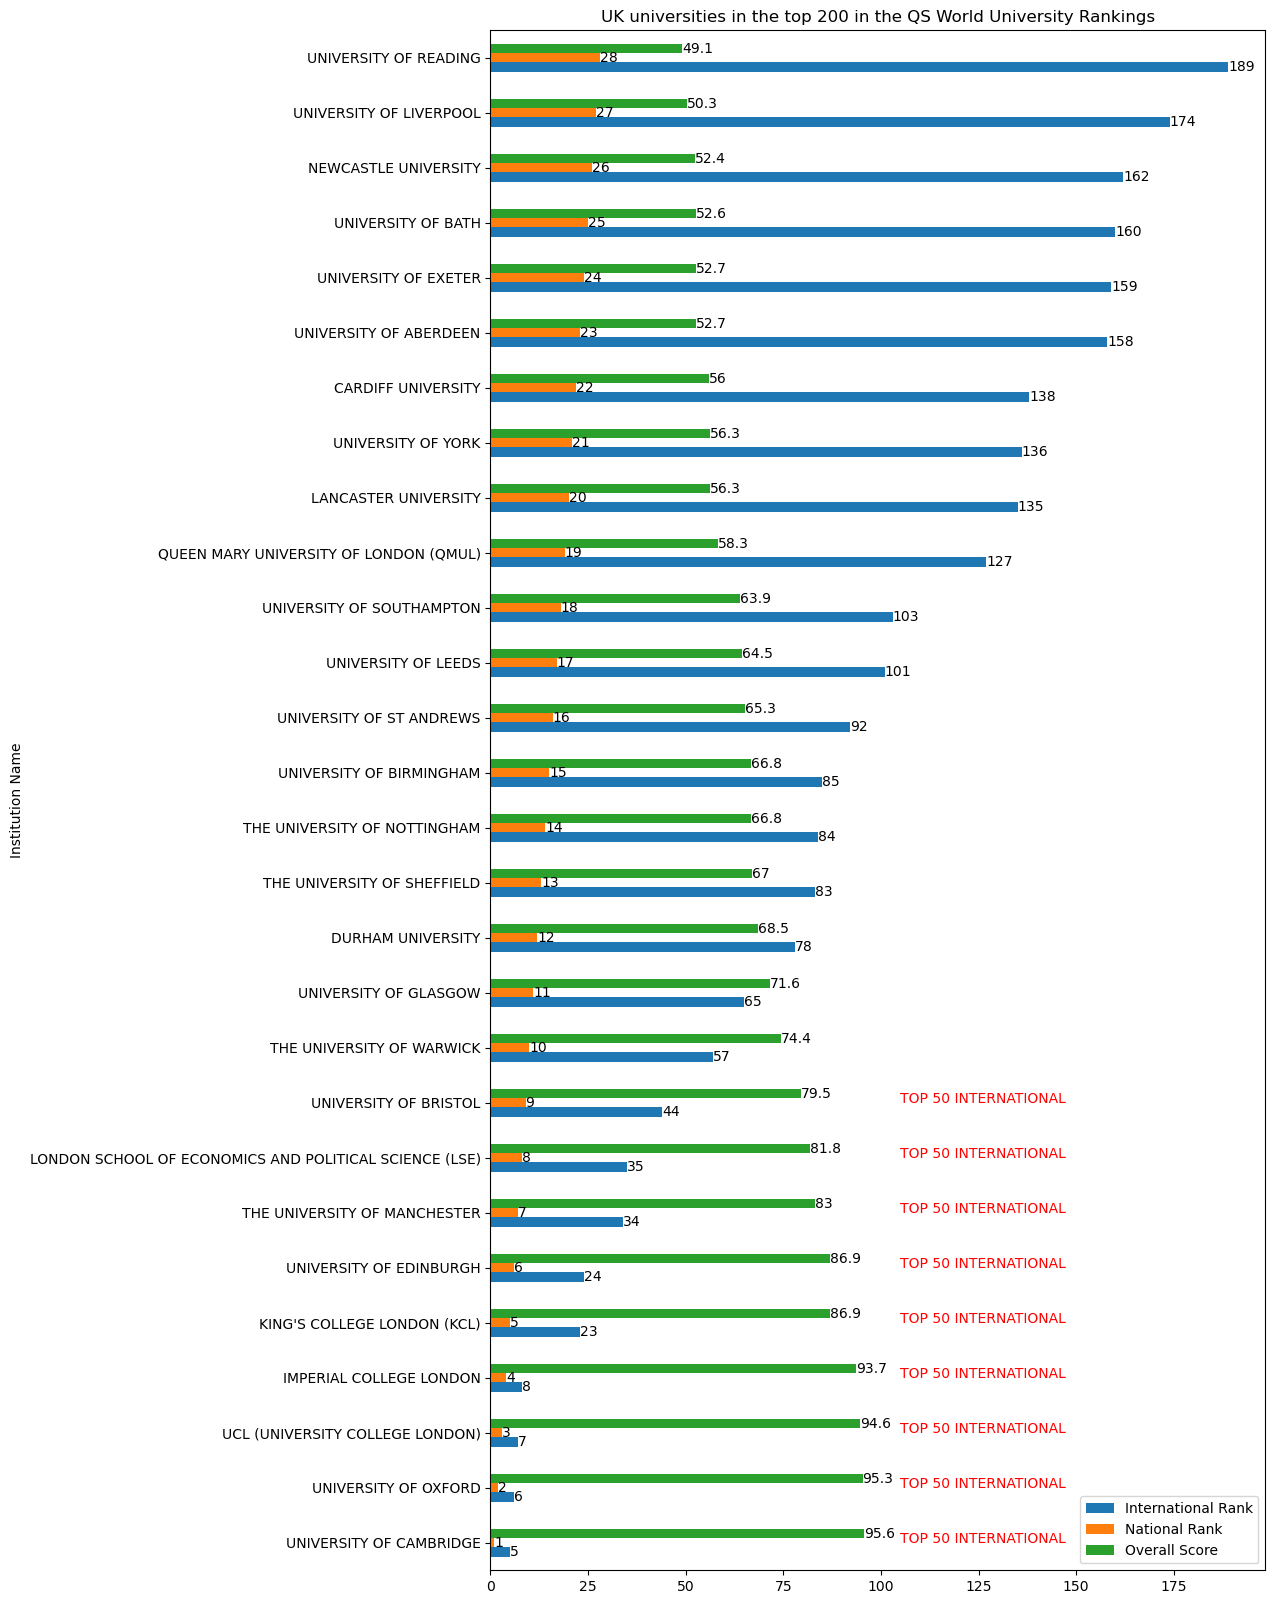

In [1]:
# CELL1 
################################################################################################################################
#libraries 
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################
#get the data from the excel sheet
top10 = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx',index_col = 0, nrows= 10)

#adjust the table
top10= top10.rename_axis(None, axis=0)
top10.columns.names = ['Institution Name']

#display the table
display(top10)

#############################################################################################################################,

#get the data from the excel sheet
unis = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')

#filter the data and reset the index
data= unis[unis['Location'] == 'United Kingdom']
data = data.reset_index()
data.index = data.index + 1

#collect all the data
df = pd.DataFrame({'International Rank': data["Rank"],
 'National Rank':data.index,
 'Overall Score' :data["Overall Score"],
 'Institution Name' : data["Institution Name"]})

#plot the horizontal bar chart
ax = df.plot(x='Institution Name', y=['International Rank', 'National Rank', 'Overall Score'] ,
kind='barh' , title='UK universities in the top 200 in the QS World University Rankings', figsize=(10,20))

#annote the bar chart so it is easier to understand
for container in ax.containers:
    ax.bar_label(container)

#label for the UK universities that are in the top 50 internationally
for y in range (0, 9):
     ax.annotate("TOP 50 INTERNATIONAL", xy = (105,y), color = 'red')

-----Explanation Paragraph-----
To test for the significance of the statistical difference, I used the t-test to generate the p-value of the two adjacent bars. From the t-test, we can look at the p-value, if the p-value between the two sets of data is <0.05, then the two sets of data are significantly different. However, from the test result, it can be seen that none of the p-values is <0.05, this means that no data are significantly different from each other. This can also be proven by the fact that the error bar of adjacent bars in the bar chart is overlapping, so no bar is highlighted.


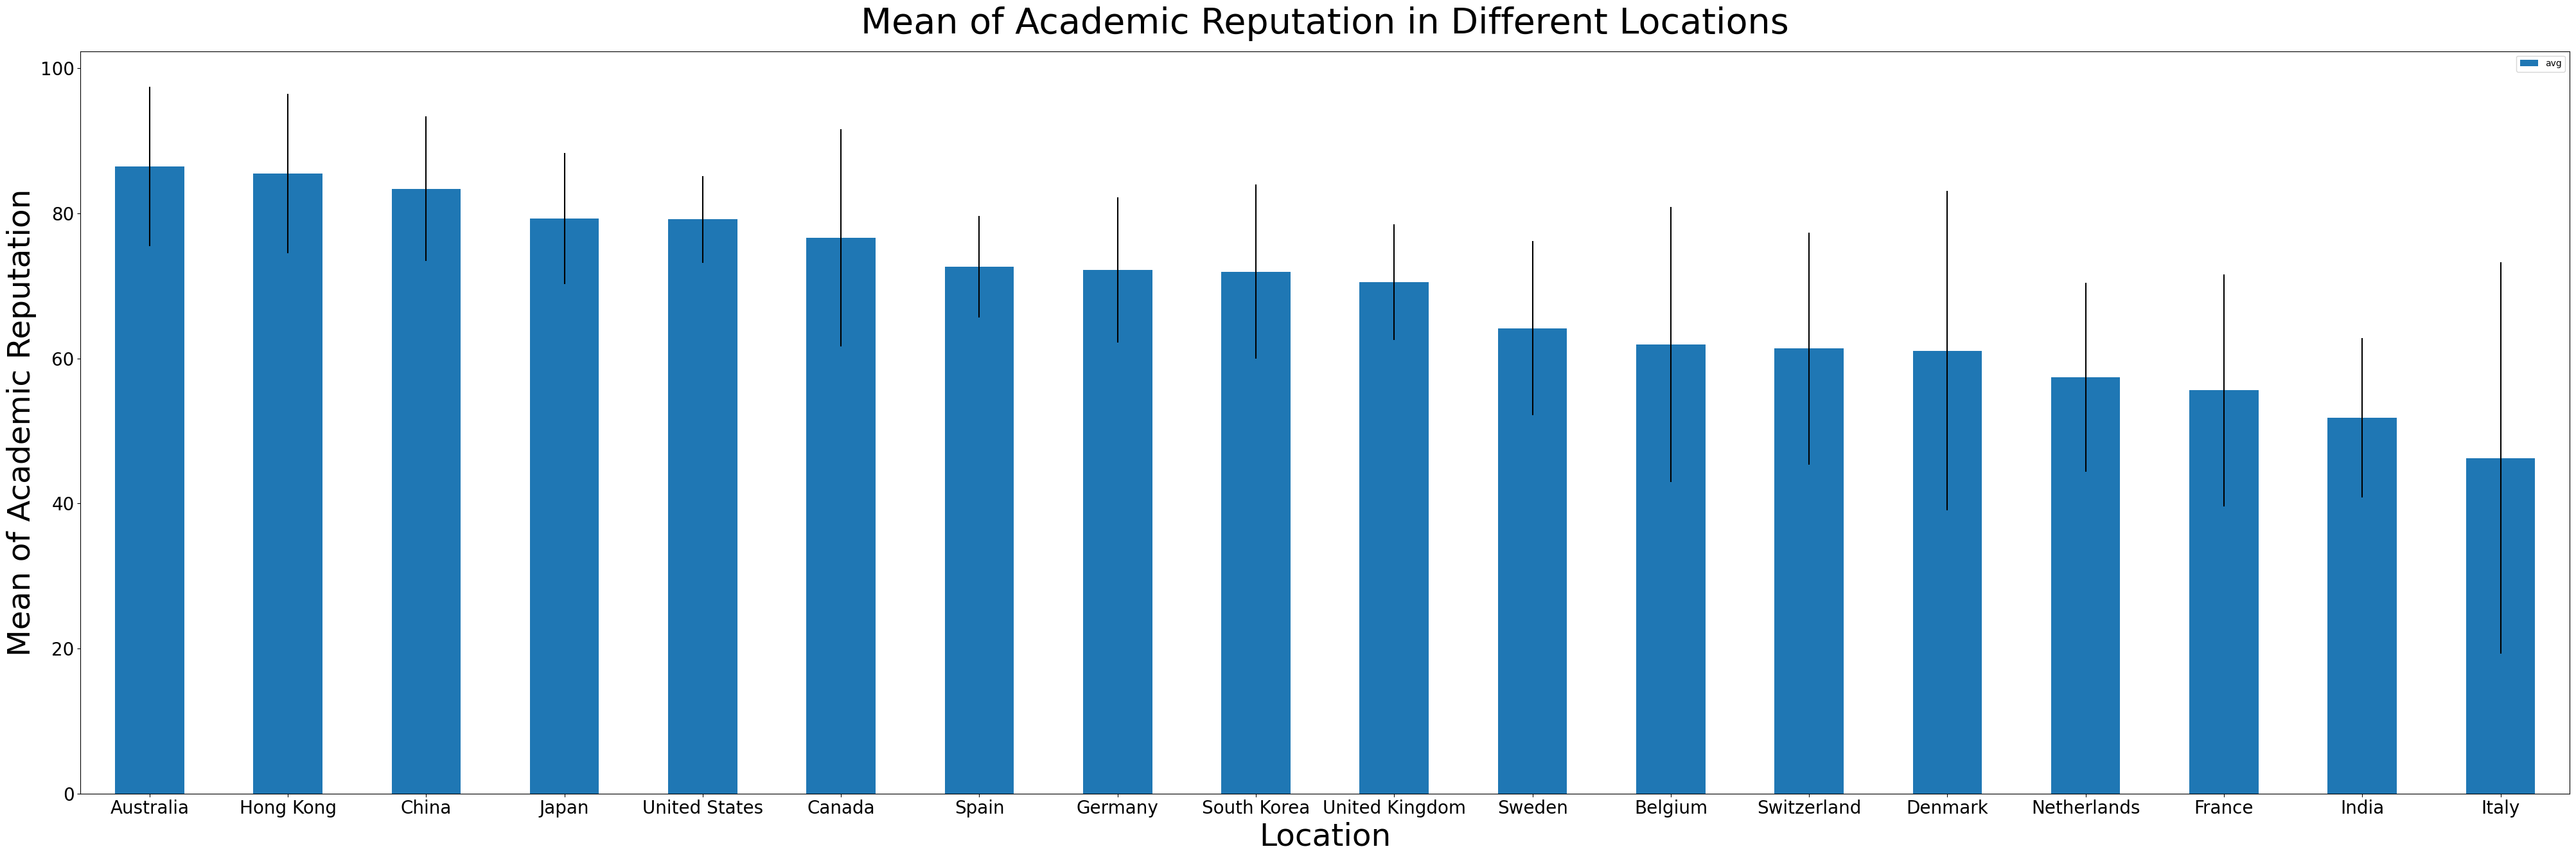

In [2]:
# CELL2 
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
import numpy as np

#collect and process all the data needed
data_ori= pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')
data = data_ori.groupby('Location').filter(lambda x : len(x) >= 3)
ar_average = data.groupby(['Location'])['Academic Reputation'].mean().to_dict()
ar_std = data.groupby(['Location'])['Academic Reputation'].std(ddof=0).to_dict()
ar_count = data.groupby(['Location'])['Academic Reputation'].count().to_dict()
confidence_interval = {}
all_data = {}

#calculate the error bar
for x, y in ar_std.items():
    for a,b in ar_count.items():
        if x == a:
            calc = round(1.96 * (y / np.sqrt(b)))
            confidence_interval[x] = calc

#merge two dictionary that contains the average of academic reputation and the confidence interval
for key in (ar_average.keys() | confidence_interval.keys()):
    if key in ar_average: all_data.setdefault(key, []).append(ar_average[key])
    if key in confidence_interval: all_data.setdefault(key, []).append(confidence_interval[key])

#sorte the data based on the average
sorted_all_data = dict(sorted(all_data.items(), key=lambda x:x[1], reverse= True))

#plotting the bar chart
df = pd.DataFrame(sorted_all_data).T
df.reset_index(inplace=True)
df.columns = ['Location','avg','con']

ax = df.plot.bar( x = 'Location', y = 'avg', rot=0, figsize=(50,15), yerr='con', fontsize = 20)
ax.set_title('Mean of Academic Reputation in Different Locations',pad=20, fontdict={'fontsize':40})
ax.set_xlabel('Location', fontdict = {'fontsize':35})
ax.set_ylabel('Mean of Academic Reputation', fontdict={'fontsize':35})


#data analysis
#print('-----------Significance Test Result-------------')
for y in df['Location'] :
    group2 = data[data['Location']== y]
    normality_test = stats.shapiro(group2['Academic Reputation'])[1]>0.05
    #print(y,'is normal?', normality_test )

shifted = df.shift(1,axis = 0)
for (x, y) in zip( shifted['Location'], df['Location'] ):
    group1 = data[data['Location']== x]
    group2 = data[data['Location']== y]
    #print(x , y)
    #print(stats.ttest_ind(group1['Academic Reputation'], group2['Academic Reputation'], equal_var=False))

#print('----------- End of Significance Test Result-------------')


print('-----Explanation Paragraph-----')
print('To test for the significance of the statistical difference, I used the t-test to generate the p-value of the two adjacent bars.',
'From the t-test, we can look at the p-value, if the p-value between the two sets of data is <0.05, then the two sets of data are significantly different.',
'However, from the test result, it can be seen that none of the p-values is <0.05, this means that no data are significantly different from each other.',
'This can also be proven by the fact that the error bar of adjacent bars in the bar chart is overlapping, so no bar is highlighted.')

In [3]:
# CELL3 
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm

#all the data needed
data = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')
data_non_uk = data[data['Location'] != 'United Kingdom']
data_non_uk = data_non_uk.dropna()
data_uk = data[data['Location'] == 'United Kingdom']
os = data_non_uk['Overall Score']
os_uk = data_uk['Overall Score']

#ols function
def calc_model (os, os_uk ,data1, data2, var_name1, var_name2, number):
    comb = data_non_uk[[data1, data2]]
    comb = sm.add_constant(comb)
    models = sm.OLS(os, comb)
    results = models.fit()

    const = round(results.params[0],2)
    base_1 = round(results.params[1],2)
    base_2 = round(results.params[2],2)
    equations = 'OS = ' + str(base_1) + '*' + var_name1 + ' + ' + str(base_2) + '*' + var_name2 + ' + ' + str(const)
    print('MODEL'+ ' ' + number + ' : ' +equations )

    #making the prediction for UK universities overall score,
    comb_uk = data_uk[[data1, data2]]
    uk_prediction = sm.add_constant(comb_uk)
    result_uk = results.predict(uk_prediction) 

    #calculate the MSE,
    result_diff = result_uk - os_uk
    squared = result_diff**2
    mse = round(squared.mean(),2)

    return equations, mse

#ols function but with three variables
def calc_model2 (os, os_uk , data1, data2, data3, var_name1, var_name2, var_name3, number):
    comb = data_non_uk[[data1, data2, data3]]
    comb = sm.add_constant(comb)
    model = sm.OLS(os, comb)
    result = model.fit()
    
    
    const = round(result.params[0],2)
    base_1 = round(result.params[1],2)
    base_2 = round(result.params[2],2)
    base_3 = round(result.params[3],2)
    equation = 'OS = ' + str(base_1) + '*' + var_name1 + ' + ' + str(base_2) + '*' + var_name2 + ' + ' + str(base_3) + '*' + var_name3 + ' + '+ str(const)
    print('MODEL'+ ' ' + number + ' : ' +equation )

    # prediction with the UK universities data
    comb_uk = data_uk[[data1, data2, data3]]
    uk_prediction = sm.add_constant(comb_uk)
    result_uk = result.predict(uk_prediction)


    #calculating MSE
    result_diff = result_uk - os_uk
    squared = result_diff**2
    mse = round(squared.mean(),2)

    return equation, mse

#using the function to get the models equation
print('--------Linear Regression Models for non-UK universities--------')
model_1 = calc_model(os, os_uk ,'Academic Reputation','Faculty Student','AR','FS', '1')
model_2 = calc_model(os, os_uk ,'Academic Reputation', 'Citations per Faculty','AR','CF', '2')
model_3 = calc_model(os, os_uk ,'Faculty Student', 'Citations per Faculty','FS', 'CF','3')
model_4 = calc_model2(os, os_uk ,'Academic Reputation','Faculty Student','Citations per Faculty','AR','FS', 'CF', '4')
print('-------- End of Linear Regression Models for non-UK universities--------')

#making tabular data for the data analysis of the models
tubular_data = {'Model Name' : ['MODEL 1', 'MODEL 2', 'MODEL 3','MODEL 4'],
                'Model Equation' : [model_1[0], model_2[0], model_3[0], model_4[0]],
                'Mean Squared Error' : [model_1[1], model_2[1], model_3[1], model_4[1]]}

df = pd.DataFrame(tubular_data)
display(df)

#conclusion
print('-----CONCLUSION-----')
print('MODEL 1 should be use for predicting the “Overall Score” of UK institutions since it has the lowest MSE (22.49) compared to other models.')

--------Linear Regression Models for non-UK universities--------
MODEL 1 : OS = 0.52*AR + 0.18*FS + 17.56
MODEL 2 : OS = 0.48*AR + 0.2*CF + 18.63
MODEL 3 : OS = 0.2*FS + 0.28*CF + 36.74
MODEL 4 : OS = 0.48*AR + 0.21*FS + 0.22*CF + 4.73
-------- End of Linear Regression Models for non-UK universities--------


,Model Name,Model Equation,Mean Squared Error
0,MODEL 1,OS = 0.52*AR + 0.18*FS + 17.56,22.49
1,MODEL 2,OS = 0.48*AR + 0.2*CF + 18.63,49.16
2,MODEL 3,OS = 0.2*FS + 0.28*CF + 36.74,116.01
3,MODEL 4,OS = 0.48*AR + 0.21*FS + 0.22*CF + 4.73,24.32


-----CONCLUSION-----
MODEL 1 should be use for predicting the “Overall Score” of UK institutions since it has the lowest MSE (22.49) compared to other models.


<Figure size 640x480 with 0 Axes>

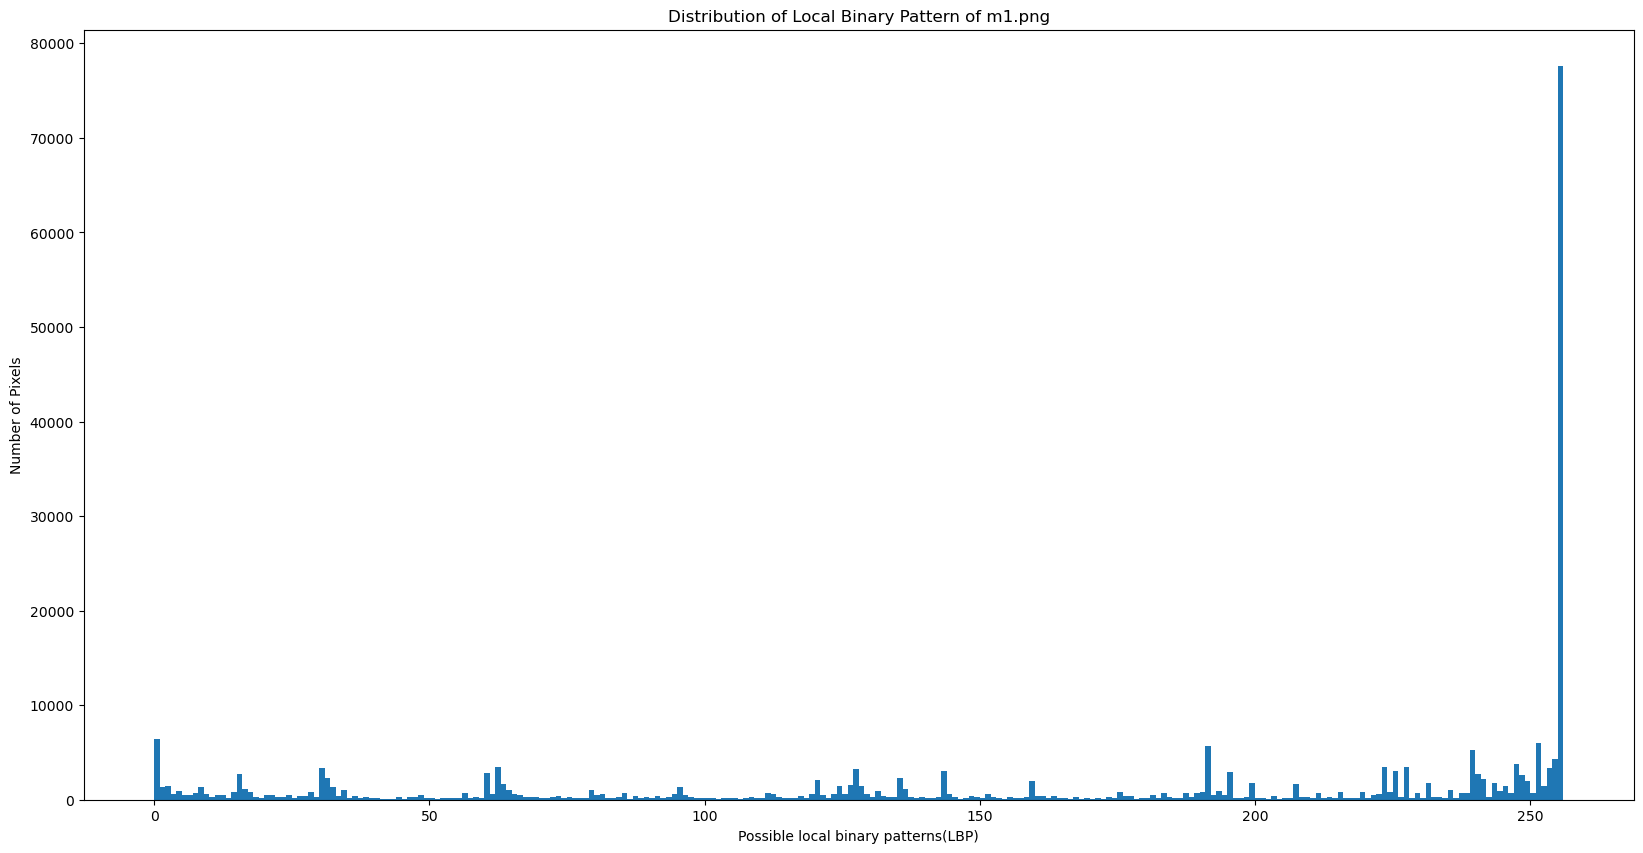

In [4]:
# CELL4 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm

#read the image
img = plt.imread('./Model/m1.png')*255
plt.gray()
#get the size of the image
row = np.size(img, 0)
col = np.size(img, 1)

#function to get the 0 and the 1
def comparing_value (image, x, y,centre):
    new_value = 0
    try:
        if centre <= image[x][y]:
            new_value = 1 
    except:
        pass
    return new_value

#function to get lbp for each centre
def getting_the_lbp (image, x, y):
    #get the mid point
    mid_point = image[x][y]
    
    #getting comparing the value from top left and go clockwise
    #this will create the 3x3 window
    tl = comparing_value(image,(x - 1), (y - 1), mid_point) 
    tp = comparing_value(image, x, (y-1), mid_point)
    tr = comparing_value(image,(x + 1), (y - 1), mid_point)
    r = comparing_value(image,(x + 1), y , mid_point)
    br = comparing_value(image,(x + 1), (y + 1), mid_point)
    bt = comparing_value(image, x, (y + 1), mid_point)
    bl = comparing_value(image,(x - 1), (y + 1), mid_point)
    l = comparing_value(image,(x - 1), y , mid_point)

    #covert the binary numbers to decimal
    lbp_pattern = (tl * 1) + (tp * 2) + (tr * 4) + (r * 8) + (br * 16) + (bt * 32) + (bl * 64) + (l * 128)
    return lbp_pattern

#make array of 0 for the image
final_img = np.zeros((col, row), np.uint8)

#looping through every single pixel that cube use for the centre
#start from 1 to exclude the border
#for loop for y first so the 3x3 window move from left to right intead of up and down
for y in range(1, col):
    for x in range(1, row):
        #contruct the LBP image 
        final_img[x, y] = getting_the_lbp(img, x, y)
        
#print(final_img)
#plt.imshow(final_img)

#make the histogram
plt.figure(figsize=(20,10))
plt.hist(final_img.ravel(),256,[0,256])
plt.title('Distribution of Local Binary Pattern of m1.png')
plt.xlabel('Possible local binary patterns(LBP)')
plt.ylabel('Number of Pixels')
plt.show()    


The correlation coefficient indicates a moderate negative relationship, this means that the two variables tend to move in the oppsite direction.


<Figure size 640x480 with 0 Axes>

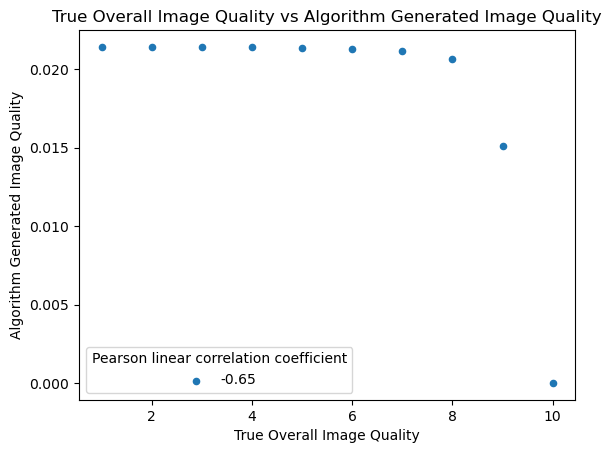

In [5]:
# CELL5
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#function to get the 0 and the 1
def comparing_value (image, x, y,centre):
    value = 0
    try:
        if centre <= image[x][y]:
            value = 1 
    except:
        pass
    return value

#function to get lbp for each centre
def getting_the_lbp (image, x, y):
    #get the mid point
    mid_point = image[x][y]
    
    #getting comparing the value from top left and go clockwise
    tl = comparing_value(image,(x - 1), (y - 1), mid_point)
    tp = comparing_value(image, x, (y-1), mid_point)
    tr = comparing_value(image,(x + 1), (y - 1), mid_point)
    r = comparing_value(image,(x + 1), y , mid_point)
    br = comparing_value(image,(x + 1), (y + 1), mid_point)
    bt = comparing_value(image, x, (y + 1), mid_point)
    bl = comparing_value(image,(x - 1), (y + 1), mid_point)
    l = comparing_value(image,(x - 1), y , mid_point)

    #covert the binary numbers to decimal
    lbp_pattern = (tl * 1) + (tp * 2) + (tr * 4) + (r * 8) + (br * 16) + (bt * 32) + (bl * 64) + (l * 128)
    return lbp_pattern

#funtion to get the histogram 
def IQA_part1 (img):
    image = plt.imread(img)*255
    plt.gray()
    row = np.size(image, 0)
    col = np.size(image, 1)
    
    #make array of 0 for the image
    final_img = np.zeros((col, row), np.uint8)

    #looping through every single pixel that cube use for the centre
    #start from 1 to exclude the border
    #for loop for y first so the 3x3 window move from left to right intead of up and down
    for y in range(1, col):
        for x in range(1, row):
            #contruct the LBP image 
            final_img[x, y] = getting_the_lbp(image, x, y)
            
    #make the histogram
    hist = np.histogram([final_img],256,[0,256],density = True) #normalisation of the histogram
   
    return hist

#funtion for comparing two array using euclidian distance to find the similarities
def IQA_part2 (test_image):
    #call function to get the histogram
    ref = IQA_part1('./Model/m1.png') #reference image
    test = IQA_part1(test_image) #test image

    #calculate the euclidean distance
    sum = 0
    for i in range(0, len(ref)):
        sum = sum + ((ref[0][i]-test[0][i])**2)
    
    eu_dis =np.sqrt(sum)
    return eu_dis
    
#read the xlsx file containing the true quality of the images
data_quality = pd.read_excel('./Q_scores.xlsx')
data_quality = list(data_quality['Quality'])

#get all the euclidean distance for each images
al_data = []

al_data.append( IQA_part2('./Model/m1.png'))
al_data.append( IQA_part2('./Model/m2.png'))
al_data.append( IQA_part2('./Model/m3.png'))
al_data.append( IQA_part2('./Model/m4.png'))
al_data.append( IQA_part2('./Model/m5.png'))
al_data.append( IQA_part2('./Model/m6.png'))
al_data.append( IQA_part2('./Model/m7.png'))
al_data.append( IQA_part2('./Model/m8.png'))
al_data.append( IQA_part2('./Model/m9.png'))
al_data.append( IQA_part2('./Model/m10.png'))


#plot the scatter chart
df = pd.DataFrame({'True Overall Image Quality': data_quality,'Algorithm Generated Image Quality' : al_data})

#pearson linear correlation coefficient
p = round(stats.pearsonr(data_quality,al_data)[0],2)

ax = df.plot(x = 'True Overall Image Quality', y='Algorithm Generated Image Quality',
kind='scatter' , title='True Overall Image Quality vs Algorithm Generated Image Quality')
ax.legend([str(p)], loc="lower left", title="Pearson linear correlation coefficient")

#interpretation of the correlation coefficient
print("The correlation coefficient indicates a moderate negative relationship, this means that the two variables tend to move in the oppsite direction.")


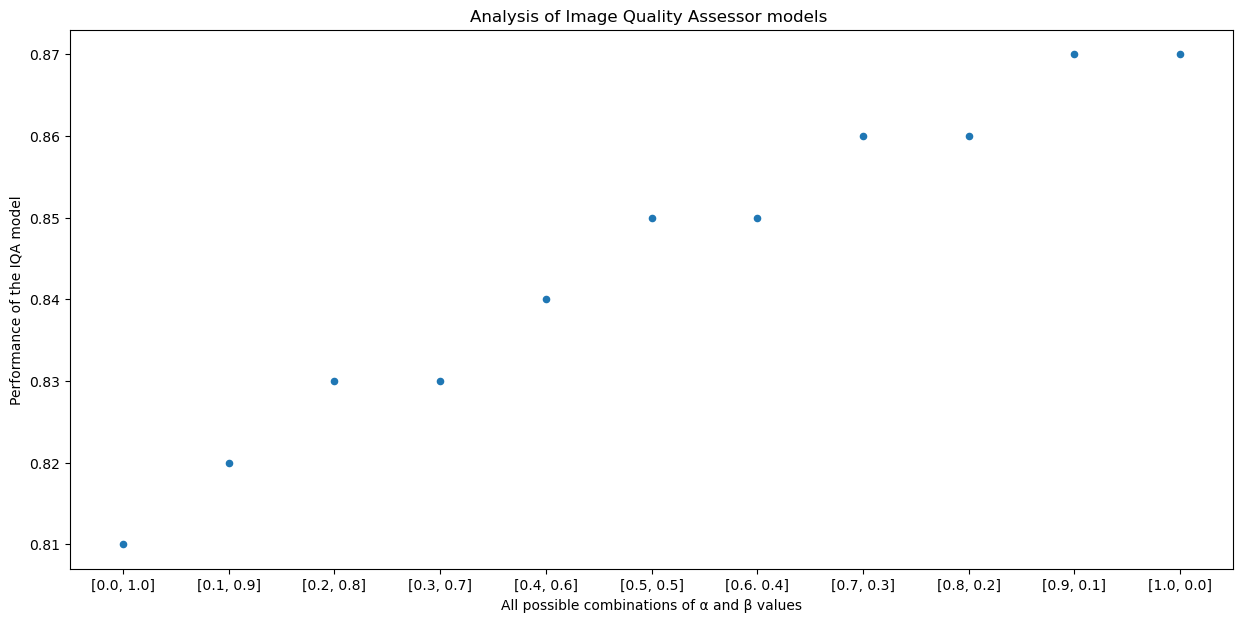

In [6]:
# CELL6 
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#function to get the mean pixel intensity
def mean_pixel_intensity(image):
    img = plt.imread('./Model/m%s.png' % image) * 255
    img = np.matrix(img)
   
    return img.mean()

#funtion to get the median
def medium_pixel_intensity(image):
    img = plt.imread('./Model/m%s.png' % image) * 255
    x = np.median(img)
    
    return x
    
#funtion to get all the possible combination of the alpha and beta values
def model():
    alpha = 0
    beta = 1
    model_val = {}
    model_val[1] = [alpha, beta]
   
    for x in range (2,12):
        alpha = round(alpha + 0.1, 1)
        beta  = round(beta - 0.1, 1)
        join = [alpha,beta]
        model_val[x] = join
    
    return model_val

#function to the the iqp value
def image_quality_assessor(image, model_number):
    ap = mean_pixel_intensity(image)
    mp = medium_pixel_intensity(image)
    value = model()
    alpha_value = value[model_number][0]
    beta_value = value[model_number][1]
    
    iqp = (alpha_value * ap) + (beta_value * mp)
   
    return iqp

#function for getting the linear correlation of the algorithm generated image quality and the true overall image quality of a model 
def pearson_linear_correlation(model_number):
    data = pd.read_excel('./Q_scores.xlsx')
    true_overall = list(data['Quality'])  
    alg_generated = []
    
    for x in range (1,11):
        result = image_quality_assessor(x, model_number)
        alg_generated.append(result)
    
    #getting the linear correaltion for the true overall image quality and algorithm generated image quality
    pearson_corr = round(stats.pearsonr(true_overall,alg_generated)[0],2)
    return pearson_corr

#getting all linear correlation values for each model
performance = []
for x in range(1,12):
    z = pearson_linear_correlation(x)
    performance.append(z)

#plotting the scatter plot
possible_comb = ["[0.0, 1.0]", "[0.1, 0.9]", "[0.2, 0.8]", "[0.3, 0.7]", "[0.4, 0.6]", "[0.5, 0.5]",
                 "[0.6. 0.4]","[0.7, 0.3]", "[0.8, 0.2]", "[0.9, 0.1]", "[1.0, 0.0]"]

df = pd.DataFrame({'Performance of the IQA model': performance,'All possible combinations of α and β values' : possible_comb})
ax = df.plot(x = 'All possible combinations of α and β values', y='Performance of the IQA model', figsize=(15,7),
kind='scatter' , title='Analysis of Image Quality Assessor models ')

In [7]:
import scipy
print(scipy.__version__)

1.9.3
